In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [4]:
#price prediction - regression


In [5]:
pip install seaborn

In [6]:
pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\laksh\anaconda3\lib\site-packages (0.12.2)Note: you may need to restart the kernel to use updated packages.



In [7]:
import seaborn as sns

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
from sklearn.metrics import r2_score

In [10]:
%matplotlib inline

In [11]:
df = pd.read_csv('gld_price_data.csv')

In [12]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [13]:
#date, spx = US stock market index , price of gold , US oil , Silver , Foreign currency 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [15]:
#data set is clean with no null values

In [16]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [17]:
df.duplicated().sum()

0

In [18]:
#EDA

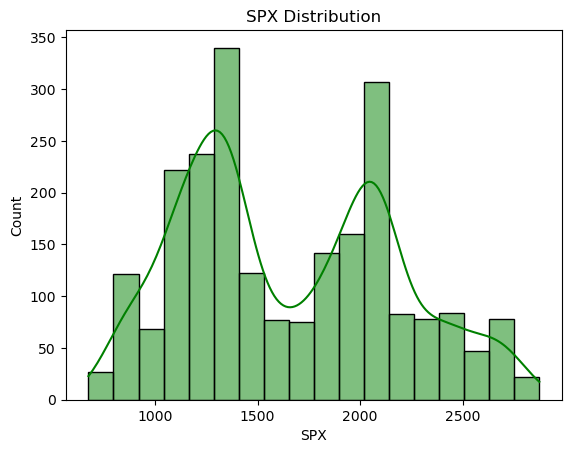

In [19]:
plt.title('SPX Distribution')
sns.histplot(data= df, x= 'SPX', kde= True, color = 'green')
plt.show()

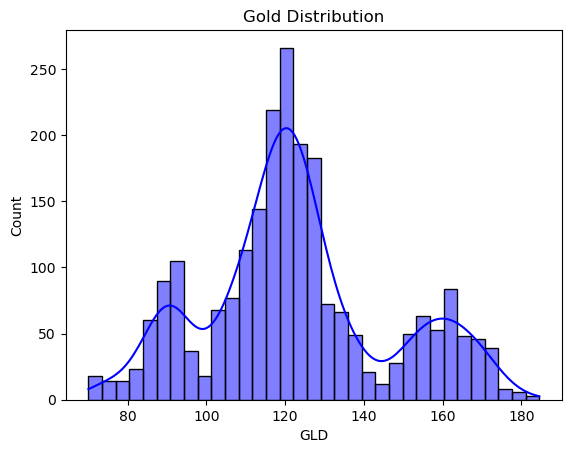

In [22]:
#gold distribution
plt.title('Gold Distribution')
sns.histplot(data= df, x= 'GLD', kde= True, color = 'blue')
plt.show()

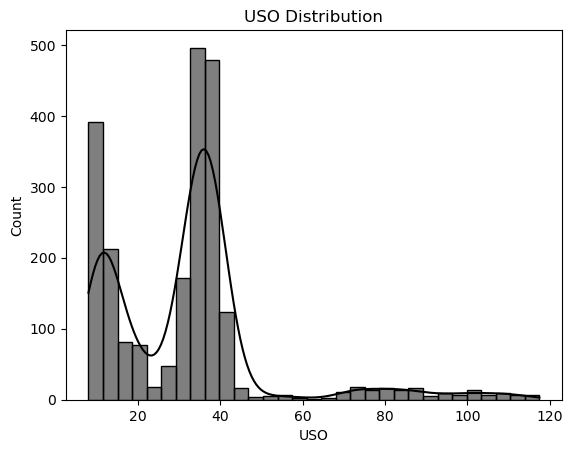

In [23]:
plt.title('USO Distribution')
sns.histplot(data= df, x= 'USO', kde= True, color = 'black')
plt.show()

In [24]:
#it's more left skewed

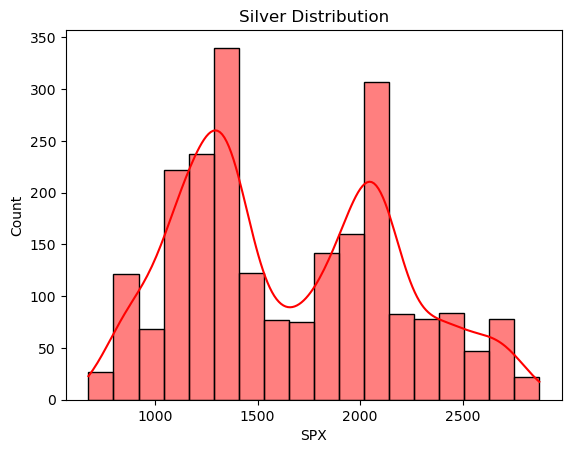

In [25]:
plt.title('Silver Distribution')
sns.histplot(data= df, x= 'SPX', kde= True, color = 'red')
plt.show()

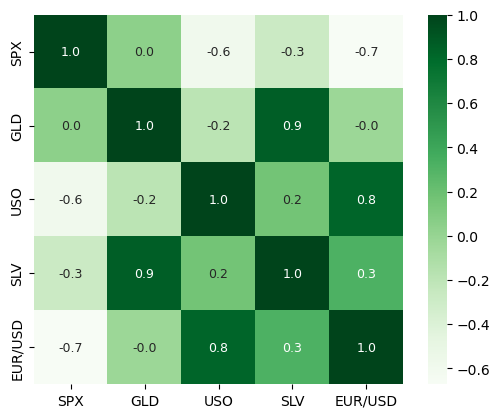

In [27]:
correlation = df.corr()
sns.heatmap(correlation, cbar=True, square= True, fmt ='.1f', annot = True, annot_kws={'size':9}, cmap='Greens')
plt.show()

In [28]:
#print all correlations with respect to gold

In [29]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

In [30]:
correlation['SLV']

SPX       -0.274055
GLD        0.866632
USO        0.167547
SLV        1.000000
EUR/USD    0.321631
Name: SLV, dtype: float64

In [31]:
#data pre-processing
X= df.drop(columns=['GLD', 'Date'], axis=1);
Y = df['GLD']

In [32]:
#split data into training and testing part
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [33]:
model = RandomForestRegressor(n_estimators=100)

In [34]:
model.fit(X_train, Y_train) #training the model

RandomForestRegressor()

In [36]:
train_data_prediction = model.predict(X_train)
test_data_prediction = model.predict(X_test)

In [37]:
print(train_data_prediction)

[109.97669773 114.66760057  90.63799979 ... 130.50759666 159.69969546
 114.79359978]


In [38]:
#check the performance by checking r2 score

In [40]:
r2_score(test_data_prediction, Y_test)

0.9890703304502388

In [ ]:
#0.98is a very good score 